___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
from datetime import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America - BAC
* CitiGroup - C
* Goldman Sachs - GS
* JPMorgan Chase - JPM
* Morgan Stanley - MS
* Wells Fargo - WFC

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)


In [2]:
# Bank of America
start = datetime(2006,1,1)
end = datetime(2016,1,1)
BAC = data.DataReader("BAC", 'yahoo', start, end)

In [3]:
C = data.DataReader("C", 'yahoo', start, end)

In [4]:
GS = data.DataReader("GS", 'yahoo', start, end)

In [5]:
JPM = data.DataReader("JPM", 'yahoo', start, end)

In [8]:
MS = data.DataReader("MS", 'yahoo', start, end)

In [7]:
WFC = data.DataReader("WFC", 'yahoo', start, end)

In [9]:
WFC.count()

Open         2517
High         2517
Low          2517
Close        2517
Adj Close    2517
Volume       2517
dtype: int64

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [10]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [11]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],keys=tickers,axis=1)

** Set the column name levels (this is filled out for you):**

In [284]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [285]:
bank_stocks.count()

Bank Ticker  Stock Info
BAC          Open          2517
             High          2517
             Low           2517
             Close         2517
             Adj Close     2517
             Volume        2517
C            Open          2517
             High          2517
             Low           2517
             Close         2517
             Adj Close     2517
             Volume        2517
GS           Open          2517
             High          2517
             Low           2517
             Close         2517
             Adj Close     2517
             Volume        2517
JPM          Open          2517
             High          2517
             Low           2517
             Close         2517
             Adj Close     2517
             Volume        2517
MS           Open          2517
             High          2517
             Low           2517
             Close         2517
             Adj Close     2517
             Volume        2517
WFC          Ope

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

In [286]:
idx = pd.IndexSlice


In [287]:
bank_stocks.T.xs('Close',level=1).max(axis=1)

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [288]:
dfret = bank_stocks.pct_change().iloc[1:].T.xs('Adj Close',level=1).T
dfret.head()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-04,-0.010620,-0.018462,-0.013812,-0.005771,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001026,0.005874
2006-01-09,0.000644,-0.004731,0.012031,0.016242,0.010585,-0.000158
2006-01-10,-0.008369,0.003099,0.012577,0.001476,0.000507,-0.000790


** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

In [289]:
import seaborn as sns

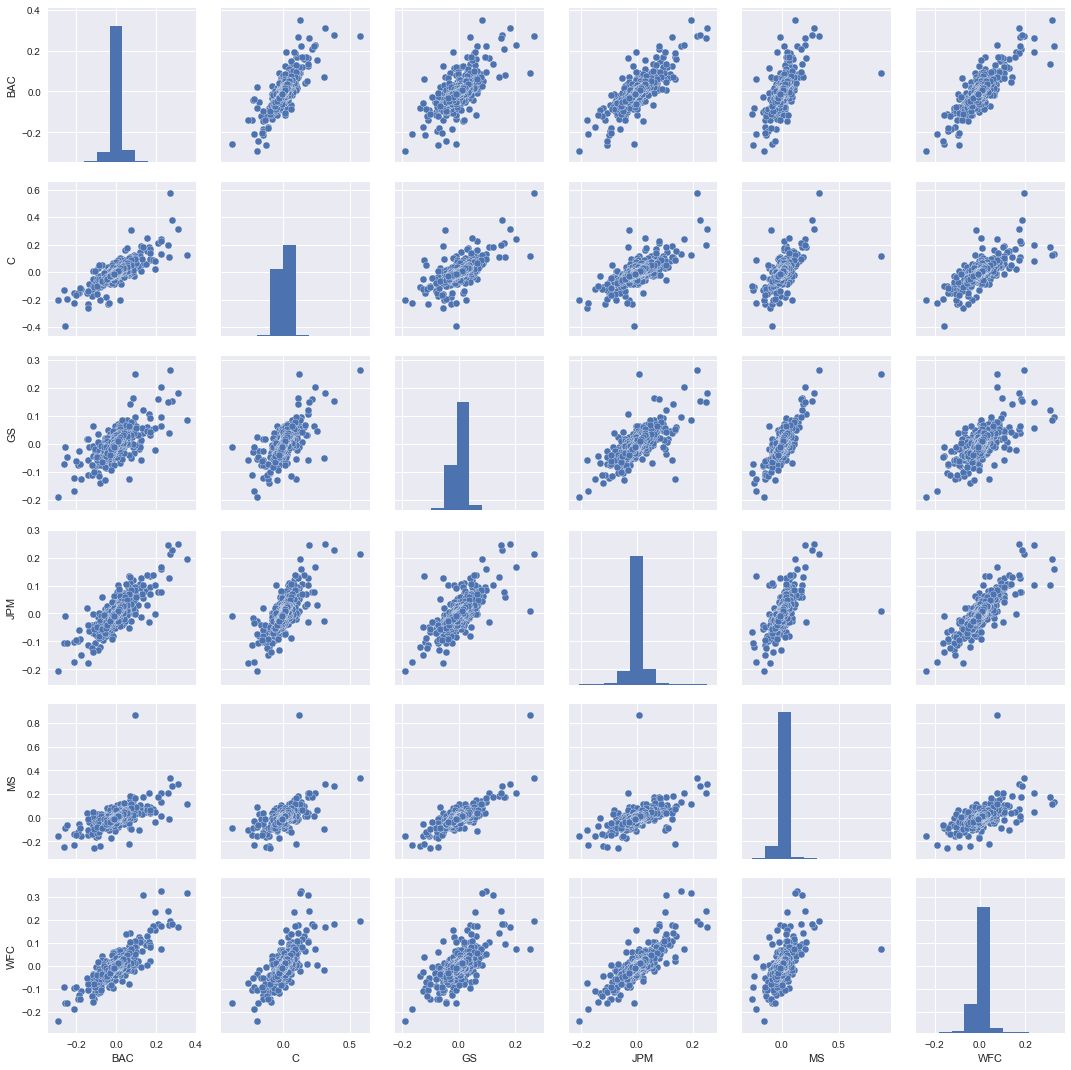

In [290]:
sns.pairplot(dfret);

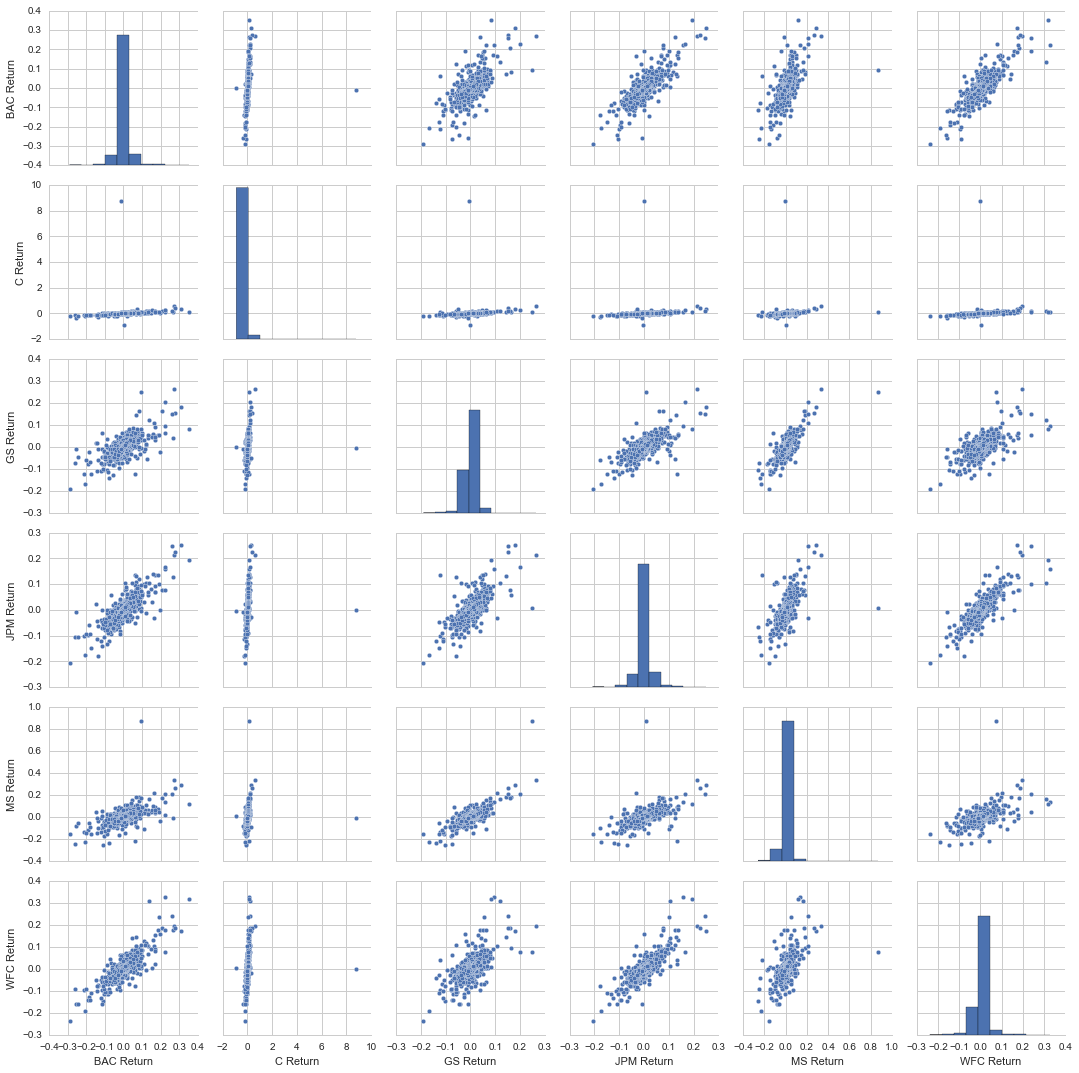

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [291]:
dfret.idxmax()

Bank Ticker
BAC   2009-04-09
C     2008-11-24
GS    2008-11-24
JPM   2009-01-21
MS    2008-10-13
WFC   2008-07-16
dtype: datetime64[ns]

In [292]:
dfret.idxmin()

Bank Ticker
BAC   2009-01-20
C     2009-02-27
GS    2009-01-20
JPM   2009-01-20
MS    2008-10-09
WFC   2009-01-20
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [293]:
dfret.std()

Bank Ticker
BAC    0.036659
C      0.038672
GS     0.025386
JPM    0.027675
MS     0.037717
WFC    0.030195
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

In [252]:
import matplotlib.pyplot as plt

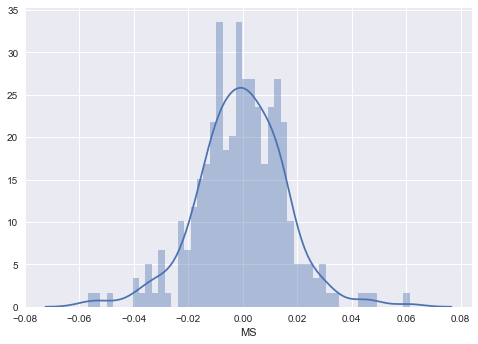

In [305]:
plt.style.use('seaborn')
sns.distplot(dfret.loc['2015-01-01':'2015-12-31']['MS'],bins=50,kde=True); # kde=Trus is the default

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



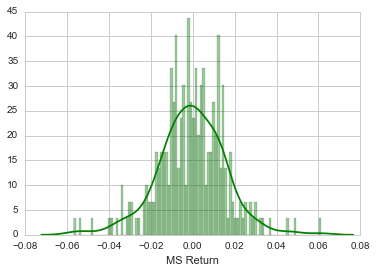

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

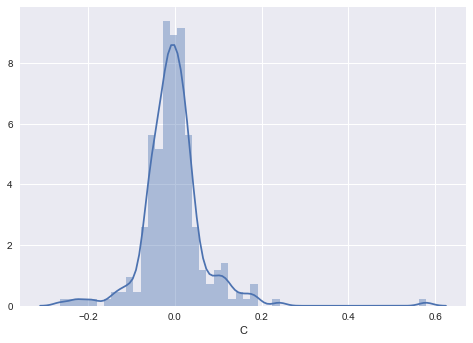

In [307]:
plt.style.use('seaborn')
sns.distplot(dfret.loc['2008-01-01':'2008-12-31']['C'],bins=50,kde=True); # kde=Trus is the default

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



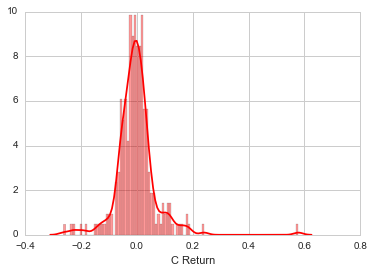

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

2.3.0


In [14]:
import cufflinks as cf

In [15]:
# For Notebooks
init_notebook_mode(connected=True)

In [16]:
cf.go_offline()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

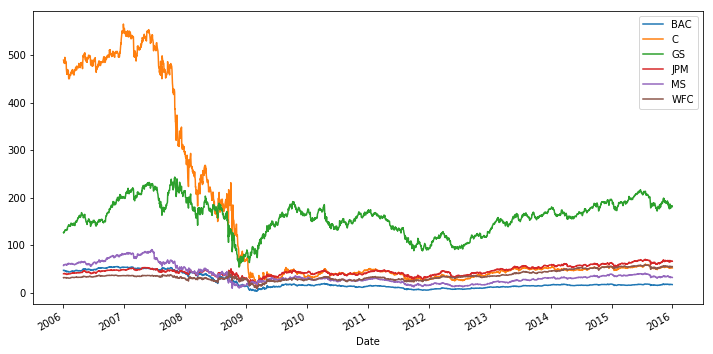

In [17]:
bank_stocks.xs('Open',level=1,axis=1).plot(figsize=(12,6))

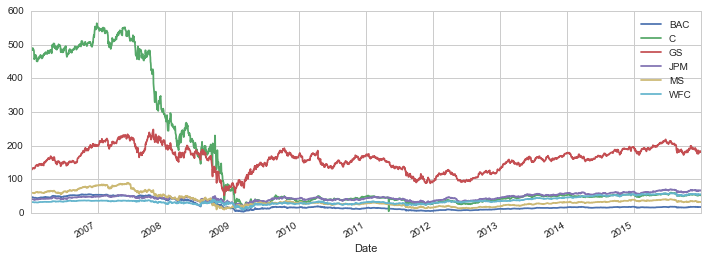

In [18]:
bank_stocks.xs('Open',level=1,axis=1).iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

In [61]:
import seaborn as sns

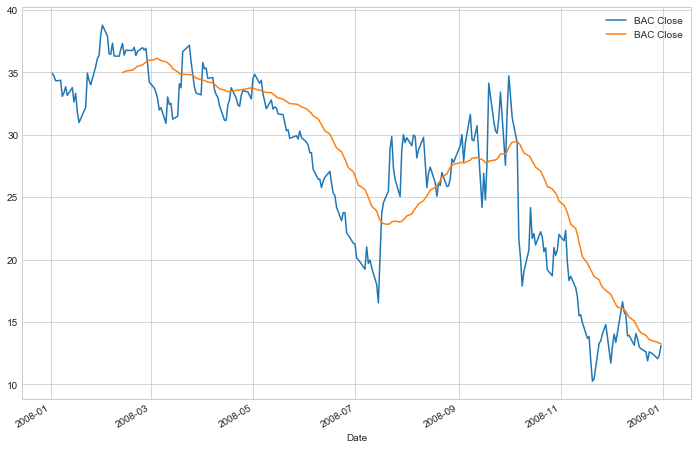

In [63]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,8))
plt.grid(axis='both')
bacclose=bank_stocks.loc['2008-01-01':'2008-12-31'].xs('Adj Close',level=1,axis=1)['BAC']
bacclose.plot(label='BAC Close')
bac30=bank_stocks.loc['2008-01-01':'2008-12-31'].xs('Adj Close',level=1,axis=1).rolling(30).mean()['BAC']
bac30.plot(label='BAC Close').plot(label='30 Day Avg')
plt.legend(loc='upper right')

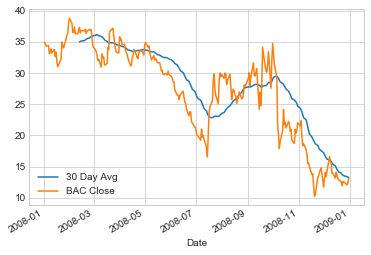

In [64]:
pd.DataFrame({
    'BAC Close' : bacclose,
    '30 Day Avg' : bac30
}).plot()

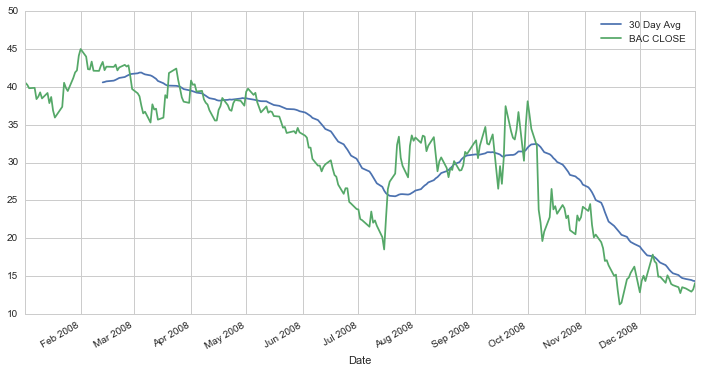

** Create a heatmap of the correlation between the stocks Close Price.**

In [71]:
dfcor = bank_stocks.xs('Adj Close',level=1,axis=1).corr()

** Optional: Use seaborn's clustermap to cluster the correlations together:**

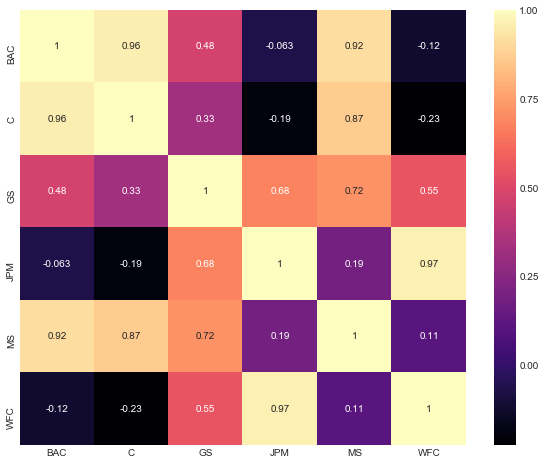

In [78]:
plt.figure(figsize=(10,8))
sns.heatmap(dfcor,annot=True,cmap='magma')

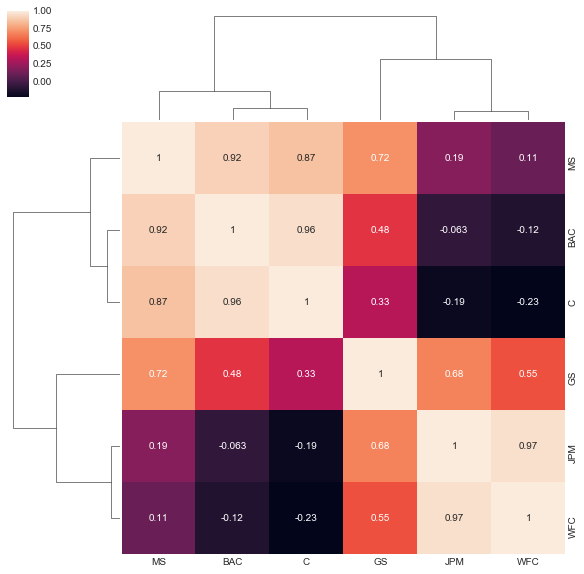

In [79]:
plt.figure(figsize=(10,8))
sns.clustermap(dfcor,annot=True)

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.